### №1 Section for importing libraries and reading data

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

colors = ['b', 'g', 'r', 'y', 'c']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), '..', 'bin_data', 'cca_example_data')
mixes_path = os.path.join(work_dir_path, 'H2O_CO2_mixes.npy')
h2o = np.load(os.path.join(work_dir_path, 'H2O.npy'))
co2 = np.load(os.path.join(work_dir_path, 'CO2.npy'))
individual_spectra = np.vstack((h2o, co2))
mixes = np.load(mixes_path)
x_axis_path = os.path.join(work_dir_path, 'x_axis.npy')
x_axis = np.load(x_axis_path)


### №2 Section for visualizing example data

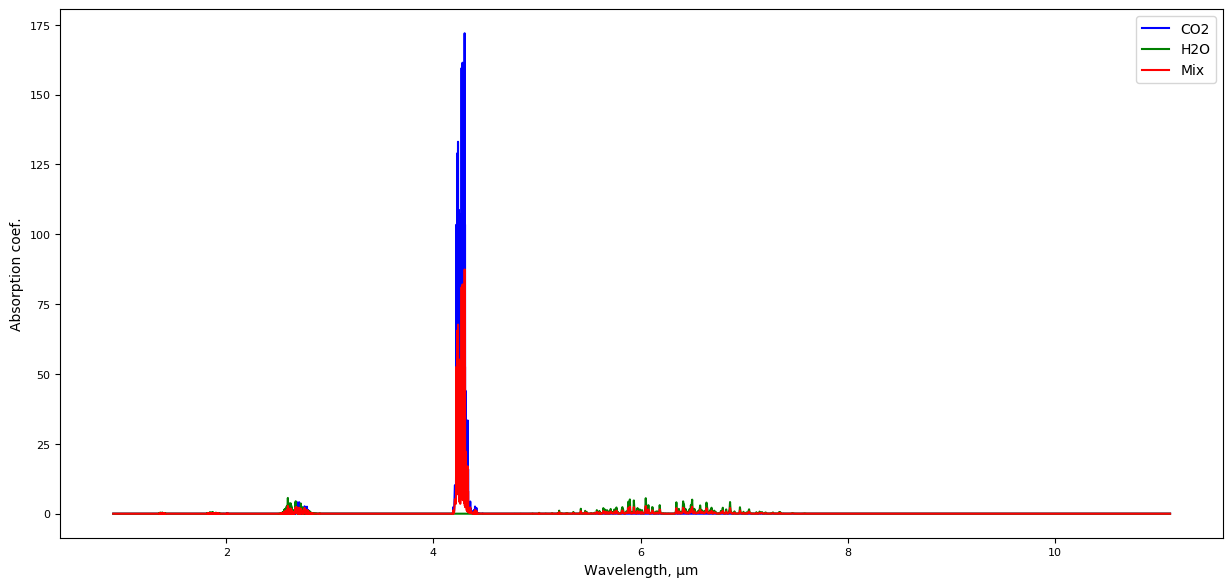

In [13]:
def plot_spectra(spectra, labels):
    unique_labels = np.unique(labels)

    fig = plt.figure(figsize=(15, 7), dpi=100)
    plt.ylabel('Absorption coef.', fontsize=10)
    plt.xlabel('Wavelength, µm', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    c = 1
    for label in unique_labels:
        label_indices = (labels[:] == label)
        label_spectra = spectra[label_indices]
        
        for spectrum in label_spectra:
            plt.plot(x_axis, spectrum, color=colors[len(colors) % c], label=label)
        c += 1

    legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
    handle_by_label = dict(zip(legend_labels, legend_handles))
    plt.legend(handle_by_label.values(), handle_by_label.keys()) 
    plt.show()

    return

spectra = np.vstack((h2o, co2, mixes[0]))
labels = np.array(['H2O', 'CO2', 'Mix'])
plot_spectra(spectra, labels)

### №3 Section for calculating CCA

In [14]:
n_components = 2
cca = CCA(n_components=n_components)
X = individual_spectra.T
Y = mixes[0]
cca_result = cca.fit_transform(X, Y)

### №4 Section for displaying CCA results

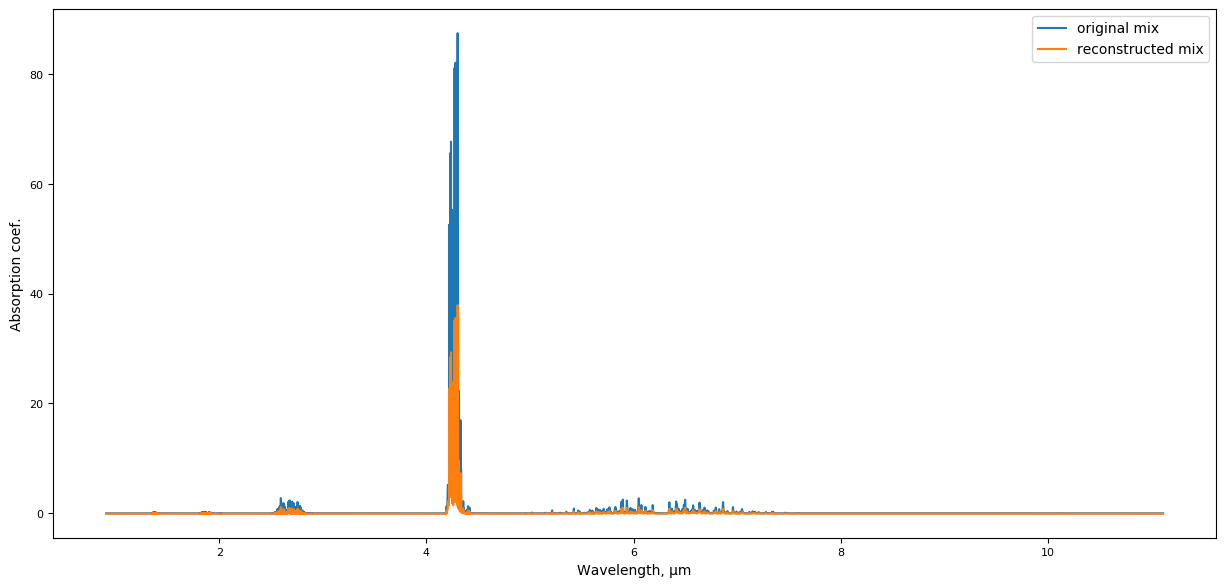

In [15]:
fig = plt.figure(figsize=(15, 7), dpi=100)
plt.ylabel('Absorption coef.', fontsize=10)
plt.xlabel('Wavelength, µm', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(x_axis, mixes[0], label = 'original mix')
plt.plot(x_axis, cca_result[1], label = 'reconstructed mix')
plt.legend()
plt.show()